In [1]:
#from utility_bfvariater import *
from utility_bfcombiner import *
from utility_common import *
from utility_commonPlot import *
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
def get_ratio(beta_mean, beta_covar):
    nsample = 100000
    c = np.linalg.cholesky( beta_covar)
    z = np.random.normal(size=(3,nsample))
    y = beta_mean.reshape(3,1) + c.dot(z)
    
    r_mean = np.array([ beta_mean[0]/beta_mean[2], beta_mean[1]/beta_mean[2]])
    r_covar = np.cov(np.stack([y[0]/y[2], y[1]/y[2]]))
    return r_mean, r_covar

In [3]:
beta_mean = np.load("../data/combine/beta_mean.npy")*100
beta_covar = np.load("../data/combine/beta_covar.npy")*100**2
beta_covar_stat = np.load("../data/combine/beta_covar_stat.npy")*100**2


r_mean, r_covar = get_ratio(beta_mean, beta_covar)
r_mean_copy, r_covar_stat = get_ratio(beta_mean, beta_covar_stat)

rv = multivariate_normal(r_mean, r_covar)
statrv = multivariate_normal(r_mean_copy, r_covar_stat)

r_invcovar=np.linalg.inv(r_covar)
r_eigenStd = 1/np.linalg.eigvals(r_invcovar)**0.5
print("delta_eigenStd", r_eigenStd)

r_invcovar=np.linalg.inv(r_covar_stat)
r_eigenStd = 1/np.linalg.eigvals(r_invcovar)**0.5
print("delta_eigenStd", r_eigenStd)

delta_eigenStd [0.01534765 0.10089305]
delta_eigenStd [0.00328614 0.0130915 ]


In [4]:
r_covar

array([[0.00507487, 0.00497016],
       [0.00497016, 0.00534008]])

In [5]:
r_covar_stat

array([[9.02198900e-05, 8.02895942e-05],
       [8.02895942e-05, 9.19661702e-05]])

In [6]:
fourbeta_mean  = np.load('../data/combine/centralValue.npy')*100
fourbeta_covar = np.load('../data/combine/stat_covar.npy')[0]*100**2 #.sum(axis=0)

fourbeta_mean = fourbeta_mean.reshape(4,3)
temp = []
for i in range(4):
    temp.append( fourbeta_covar[3*i+0:3*i+3,3*i+0:3*i+3] )
fourbeta_covar = np.array(temp)


fourr_mean,fourr_covar = [], []
for i in range(4):
    m,var = get_ratio(fourbeta_mean[i],fourbeta_covar[i])
    fourr_mean.append(m)
    fourr_covar.append(var)
fourr_mean,fourr_covar = np.array(fourr_mean),np.array(fourr_covar)   

for i in range(4):
    pdgr_invcovar=np.linalg.inv(fourr_covar[i])
    pdgr_eigenStd = 1/np.linalg.eigvals(pdgr_invcovar)**0.5
    print("delta_eigenStd", pdgr_eigenStd)


fourrv = [ multivariate_normal(fourr_mean[i], fourr_covar[i]) for i in range(4)]



r_mutau1 = np.load("../data/combine/r_mutau1.npy")
r_mutau2 = np.load("../data/combine/r_mutau2.npy")
r_etau1  = np.load("../data/combine/r_etau1.npy")
r_etau2  = np.load("../data/combine/r_etau2.npy")


delta_eigenStd [0.00575435 0.02423312]
delta_eigenStd [0.00732891 0.02965823]
delta_eigenStd [0.02844298 0.00694208]
delta_eigenStd [0.00829973 0.03114101]


In [7]:
#PDG
pdgbeta_mean=np.array([10.71, 10.63, 11.38])
pdgbeta_sigma=np.array([0.16, 0.15, 0.21])
pdgbeta_covar= np.outer(pdgbeta_sigma,pdgbeta_sigma)
def getcovar(i,j,fstd):
    fvar = fstd**2
    f = pdgbeta_mean[i]/pdgbeta_mean[j]
    # print(f,fstd)
    value =  pdgbeta_covar[i,i]/pdgbeta_mean[i]**2 + pdgbeta_covar[j,j]/pdgbeta_mean[j]**2 -  fvar/f**2
    value *= 0.5*pdgbeta_mean[i]*pdgbeta_mean[j]
    pdgbeta_covar[i,j] = value
    pdgbeta_covar[j,i] = value

getcovar(1,0, 0.013)
getcovar(2,0, 0.024)
getcovar(2,1, 0.026)

pdgr_mean, pdgr_covar = get_ratio(pdgbeta_mean,pdgbeta_covar)

pdgrv = multivariate_normal(pdgr_mean, pdgr_covar)
pdgr_invcovar=np.linalg.inv(pdgr_covar)
pdgr_eigenStd = 1/np.linalg.eigvals(pdgr_invcovar)**0.5
print("delta_eigenStd", pdgr_eigenStd)

delta_eigenStd [0.008611   0.02994589]


In [8]:
print(pdgbeta_mean)
print(pdgbeta_covar)

[10.71 10.63 11.38]
[[ 0.0256      0.01427361  0.0032627 ]
 [ 0.01427361  0.0225     -0.00303531]
 [ 0.0032627  -0.00303531  0.0441    ]]


In [9]:
a = pdgbeta_covar/np.outer(pdgbeta_sigma,pdgbeta_sigma)
np.save('../data/combine/pdgbeta_corr',a)

In [10]:
# Our 2-dimensional distribution will be over variables X and Y
N = 4000
x = np.linspace(.82, 1.22, N)
y = np.linspace(.82, 1.22, N)
X, Y = np.meshgrid(x, y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [39]:
nll     = -rv.logpdf(pos) + rv.logpdf(r_mean)
statnll = -statrv.logpdf(pos) + statrv.logpdf(r_mean_copy)
pdgnll  = -pdgrv.logpdf(pos) + pdgrv.logpdf(pdgr_mean)
fournll = [ -fourrv[i].logpdf(pos) + fourrv[i].logpdf(fourr_mean[i]) for i in range(4) ]

def get_pvalue(Z, point):
    points = np.array(point)
    deltax = x[1]-x[0]
    integral = Z[Z>rv.pdf(point)].sum() * deltax**2
    pvalue = 1-integral
    return pvalue
         
Z = rv.pdf(pos)
pvalue = get_pvalue(Z, [1.001,1.001])
print(pvalue)

Z = pdgrv.pdf(pos)
pdgpvalue = get_pvalue(Z, [1.001,1.001])
print(pdgpvalue)

0.8021402744210475
0.13357642329027264


/home/zchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: linewidths is ignored by contourf
  from ipykernel import kernelapp as app


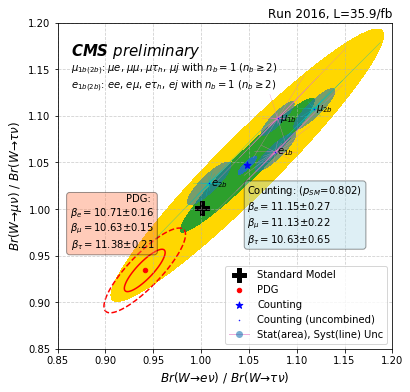

In [71]:
fig, ax = plt.subplots(figsize=(6,6),facecolor='w')


    
plt.contourf(X, Y, nll,[0, 0.5, 2],colors=["C2","gold"],alpha=1,zorder=0)
# plt.contour(X, Y, nll,   [ 0.5, 2],colors=["C2","gold"],alpha=1,zorder=0)
plt.contour(X, Y, pdgnll,[ 0.5, 2],colors=["red","red"],alpha=1,linestyles=["-","--"],zorder=0)

plt.scatter(1.001,1.001,color='k',marker='P',s=200,label="Standard Model",zorder=1)
plt.scatter(pdgr_mean[0],pdgr_mean[1],color='r',marker='o',s=20,label="PDG",zorder=1)
plt.scatter(r_mean[0],r_mean[1],color='b',marker='*',s=50,label="Counting",zorder=3)

plt.contourf(X, Y, statnll, [ 0, 0.5], colors=["C0"],alpha=1, zorder=2)
for i in range(4):
    plt.contourf(X, Y, fournll[i], [0, 0.5], colors=["C0"], alpha=0.6, zorder=2, linewidths=[1])



measuresLabel = ["$\mu_{1b}$","$\mu_{2b}$","$e_{1b}$","$e_{2b}$"]
plt.scatter( fourr_mean[:,0],fourr_mean[:,1],marker=".",color="b",s=1,zorder=3,label="Counting (uncombined)")
for i in range(4):
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.4, edgecolor="None")
    plt.text(fourr_mean[i,0]+0.002,fourr_mean[i,1]-0.002,measuresLabel[i], zorder=3) #bbox=props,
for i in range(r_mutau1.shape[0]):
    color = ["C6","c","C6","c"]
    for j in range(4):
        plt.plot([r_etau1[i,j], r_etau2[i,j]], [r_mutau1[i,j], r_mutau2[i,j]],"-",lw=0.3, color=color[j], alpha=1, zorder=2)


plt.grid(linestyle="--",alpha=0.6)
# plt.xticks([-1.5, -1,-.5,0,0.5,1,1.5],fontsize=12)
# plt.yticks([-1.5,-1,-.5,0,0.5,1,1.5],fontsize=12)

plt.xlim(0.85,1.2)
plt.ylim(0.85,1.2)
plt.xlabel(r"$Br(W\to e\nu)$ / $Br(W\to \tau\nu) $",fontsize=12)
plt.ylabel(r"$Br(W\to \mu \nu)$ / $Br(W\to \tau\nu) $",fontsize=12)

pdgbetaText = "PDG:"
pdgbetaText = pdgbetaText +" \n" + r"$\beta_{e}   =$" + r"{:4.2f}$\pm${:4.2f}".format(pdgbeta_mean[0],pdgbeta_covar[0,0]**0.5)
pdgbetaText = pdgbetaText +" \n" + r"$\beta_{\mu} =$" + r"{:4.2f}$\pm${:4.2f}".format(pdgbeta_mean[1],pdgbeta_covar[1,1]**0.5)
pdgbetaText = pdgbetaText +" \n" + r"$\beta_{\tau}=$" + r"{:4.2f}$\pm${:4.2f}".format(pdgbeta_mean[2],pdgbeta_covar[2,2]**0.5)
props = dict(boxstyle='round', facecolor='coral', alpha=0.4, edgecolor="k")
plt.text(pdgr_mean[0]+0.01, pdgr_mean[1]+0.02,pdgbetaText, verticalalignment='bottom',horizontalalignment='right', bbox=props)

betaText = "Counting: " +r"($p_{SM}$="+ "{:4.3})".format(pvalue)
betaText = betaText +" \n" + r"$\beta_{e}   =$" + r"{:4.2f}$\pm${:4.2f}".format(beta_mean[0],beta_covar[0,0]**0.5)
betaText = betaText +" \n" + r"$\beta_{\mu} =$" + r"{:4.2f}$\pm${:4.2f}".format(beta_mean[1],beta_covar[1,1]**0.5)
betaText = betaText +" \n" + r"$\beta_{\tau}=$" + r"{:4.2f}$\pm${:4.2f}".format(beta_mean[2],beta_covar[2,2]**0.5)
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.4, edgecolor="k")
plt.text(r_mean[0], r_mean[1]-0.02, betaText, verticalalignment='top', horizontalalignment='left', bbox=props)

plt.text(0.04, 0.9, r'CMS $preliminary$', style='italic', fontsize='15', fontweight='bold', transform=ax.transAxes)
plt.text(0.04, 0.85, r"$\mu_{1b (2b)}$: $\mu e$, $\mu\mu$, $\mu \tau _h$, $\mu j$ with $n_b=1$ ($n_b\geq2$)", fontsize='10', transform=ax.transAxes)
plt.text(0.04, 0.80, r"$e_{1b (2b)}$: $e e$, $e\mu$, $e \tau _h$, $ej$ with $n_b=1$ ($n_b\geq2$)", fontsize='10', transform=ax.transAxes)

ax.set_title("Run 2016, L=35.9/fb", loc='right', fontsize='12')
# plt.text(0.04, 0.8, subtitle, fontsize='12', transform=ax.transAxes)



handles, labels = plt.gca().get_legend_handles_labels()

patch = plt.plot([],[], marker="o",  ms=7, color="C6", lw=1, markerfacecolor="C0",markeredgewidth=0, alpha=0.6, label="Stat(area), Syst(line) Unc")[0] 
handles.append(patch)
# patch = plt.plot([],[], marker="o", ms=0, color="C0", lw=1, alpha=0.6, label="Syst Unc")[0] 
# handles.append(patch)
plt.legend(handles=handles,loc="lower right",fontsize=10)


# plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), 
#            loc='center', ncol=2, facecolor="plum", numpoints=1 )



plt.savefig('../plots/combine/r2.png',dpi=300)
plt.savefig('../plots/combine/r2.pdf')

In [21]:
handles

In [22]:
labels

['SM', 'PDG', 'Counting', 'Counting (partial)']

In [9]:
# C = np.linalg.cholesky(delta_covar)
# x = np.random.normal(0,1,(10000,2))
# x = np.matmul(C,x.T)
# x = delta_mean[:,None] + x

In [18]:
measures

# def get_pvalue_for_pos(rv):
    
#     Z = rv.pdf(pos)
#     result = np.zeros_like(Z)
    
#     for i in range(N):
#         for j in range(N):
#             point = pos[i,j]
#             result[i,j] = get_pvalue(Z, point)
#     return result

# pvalues = get_pvalue_for_pos(rv)
# pdgpvalues = get_pvalue_for_pos(pdgrv)   

array([[1.0800135 , 1.09717826],
       [1.11834508, 1.10746719],
       [1.0776976 , 1.06110845],
       [1.0084219 , 1.02747097]])